In [11]:
import os
import cartopy
import matplotlib.pyplot as plt
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})

In [4]:
coordinates = [2.2, 3.5, 39.1, 40.]
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

textprops = dict(facecolor='white', alpha=0.05, edgecolor='white')
lonmooring, latmooring = 2 + 42.02430 / 60., 39 + (29.57088 / 60.)

In [5]:
textprops = dict(facecolor='white', alpha=0.05, edgecolor='white')
lonmooring, latmooring = 2 + 42.02430 / 60., 39 + (29.57088 / 60.)

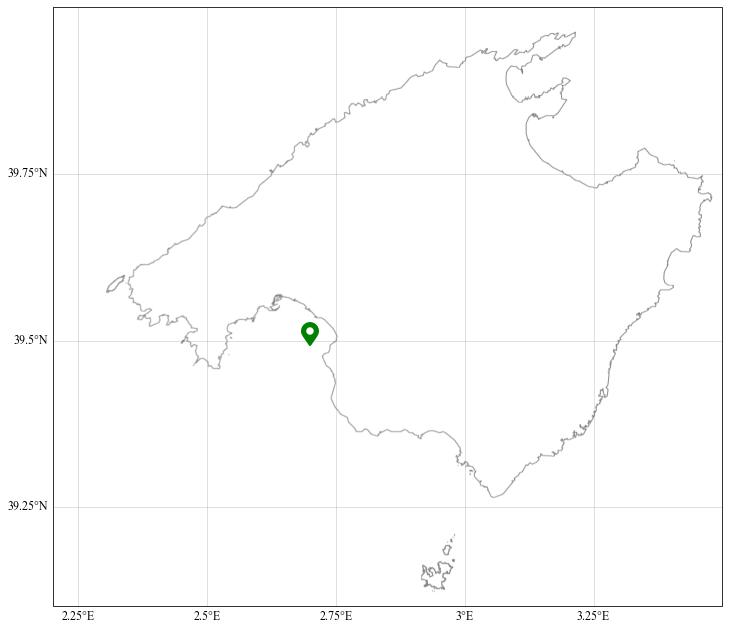

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

ax.text(lonmooring, latmooring, "\uf3c5", fontproperties=fp1, transform=ccrs.PlateCarree(),
            fontsize=24, ha="center", va="bottom", zorder=7, color="green")
ax.plot()
# EMODnet bathymetry
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['coastlines'],
               transform=myproj, zorder=3)

# Grid lines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(1., 5., .25))
gl.ylocator = mticker.FixedLocator(np.arange(38., 40.5, 0.25))

# Domain extension
ax.set_extent(coordinates)

# plt.savefig("../figures/canary_map0001.png", dpi=300, bbox_inches="tight")
plt.show()